<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install pip install nbdev &> 2

     |████████████████████████████████| 186 kB 5.2 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 46 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 310 kB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/machine_learning/tires'  #change dir to your project folder

Mounted at /content/gdrive


In [ ]:
!ls {root_path}/tire-dataset/flat

00000.jpg  00043.jpg  00086.jpg  00129.jpg  00172.jpg  00215.jpg  00258.jpg
00001.jpg  00044.jpg  00087.jpg  00130.jpg  00173.jpg  00216.jpg  00259.jpg
00002.jpg  00045.jpg  00088.jpg  00131.jpg  00174.jpg  00217.jpg  00260.jpg
00003.jpg  00046.jpg  00089.jpg  00132.jpg  00175.jpg  00218.jpg  00261.jpg
00004.jpg  00047.jpg  00090.jpg  00133.jpg  00176.jpg  00219.jpg  00262.jpg
00005.jpg  00048.jpg  00091.jpg  00134.jpg  00177.jpg  00220.jpg  00263.jpg
00006.jpg  00049.jpg  00092.jpg  00135.jpg  00178.jpg  00221.jpg  00264.jpg
00007.jpg  00050.jpg  00093.jpg  00136.jpg  00179.jpg  00222.jpg  00265.jpg
00008.jpg  00051.jpg  00094.jpg  00137.jpg  00180.jpg  00223.jpg  00266.jpg
00009.jpg  00052.jpg  00095.jpg  00138.jpg  00181.jpg  00224.jpg  00267.jpg
00010.jpg  00053.jpg  00096.jpg  00139.jpg  00182.jpg  00225.jpg  00268.jpg
00011.jpg  00054.jpg  00097.jpg  00140.jpg  00183.jpg  00226.jpg  00269.jpg
00012.jpg  00055.jpg  00098.jpg  00141.jpg  00184.jpg  00227.jpg  00270.jpg
00013.jpg  0

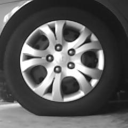

In [ ]:
im = Image.open(f"{root_path}/tire-dataset/flat/00000.jpg")
im.to_thumb(128,128)

Create array with Path objects to imgs

In [ ]:
path = Path(f"{root_path}/tire-dataset")
fns = get_image_files(path)
fns

(#900) [Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00000.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00001.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00002.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00003.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00004.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00005.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00006.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00007.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00008.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00009.jpg')...]

In [ ]:
doc(get_image_files)

In [ ]:
imgs = get_image_files(f"{root_path}/tire-dataset")
imgs

(#900) [Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00000.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00001.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00002.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00003.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00004.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00005.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00006.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00007.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00008.jpg'),Path('gdrive/MyDrive/machine_learning/tires/tire-dataset/flat/00009.jpg')...]

In [ ]:
doc(parent_label)

In [ ]:
tires = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

tires

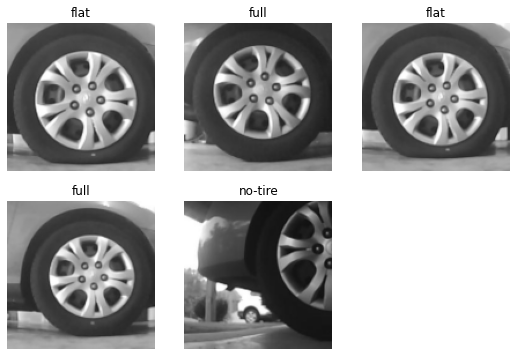

In [ ]:
dls = tires.dataloaders(path)
dls.valid.show_batch(max_n=5)

In [ ]:
tires = tires.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = tires.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.00044668358168564737)

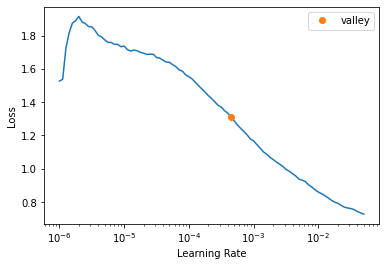

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [ ]:
lr = 3e-3
learn.fine_tune(6, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.976036,0.737712,0.738889,00:20


epoch,train_loss,valid_loss,accuracy,time
0,0.430991,0.870735,0.688889,00:07
1,0.378910,0.337950,0.894444,00:07
2,0.325014,0.208788,0.938889,00:07
3,0.288141,0.055917,0.972222,00:07
4,0.249578,0.059162,0.977778,00:07
5,0.220653,0.023774,0.988889,00:07


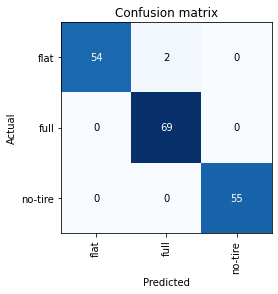

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
doc(learn)

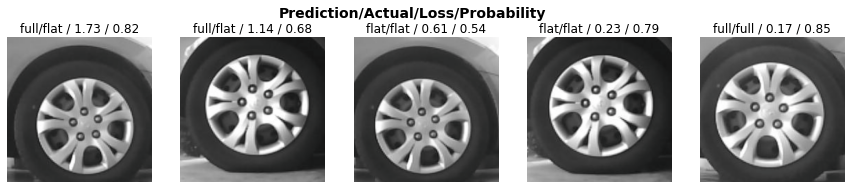

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
doc(interp)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.000630957365501672)

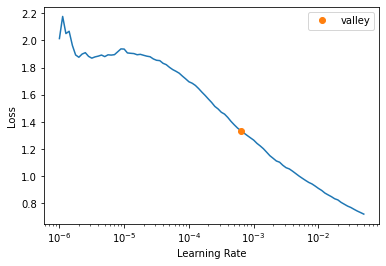

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [ ]:
lr = 3e-3
learn.fine_tune(6, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.992114,0.610206,0.766667,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.413169,0.159516,0.933333,00:10
1,0.355274,0.125347,0.966667,00:10
2,0.311404,0.048446,0.983333,00:10
3,0.277582,0.013320,0.994444,00:10
4,0.248754,0.022881,0.988889,00:10
5,0.229483,0.022434,0.988889,00:10


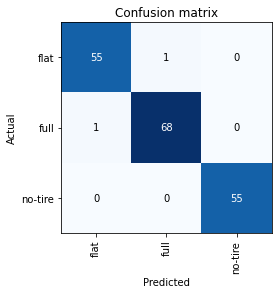

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

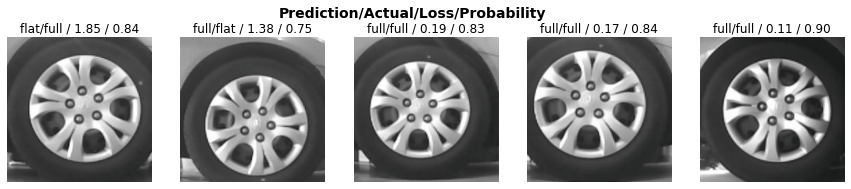

In [ ]:
interp.plot_top_losses(5, nrows=1)